In [137]:
import polars as pl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates

## Check if statistically significant difference between treatment groups with wilcoxon rank-sum test

In [138]:
df = pl.read_csv("../data/processed/cleaned_sleep_data_experiment.csv", try_parse_dates=True)
# df.filter(pl.col("sleep_day") == pl.date(2025,6,2)) # Bad measurement day
df

sleep_day,awake_duration_mins,asleep_unspecified_duration_mins,asleep_core_duration_mins,asleep_rem_duration_mins,asleep_deep_duration_mins,total_sleep_duration_mins,total_time_in_bed_mins,sleep_period_start,sleep_period_end,calendar_week,experiment_group
date,f64,f64,f64,f64,f64,f64,f64,"datetime[μs, UTC]","datetime[μs, UTC]",i64,str
2025-05-12,46.0,0.0,240.5,84.0,45.0,369.5,415.5,2025-05-11 22:52:07 UTC,2025-05-12 05:44:37 UTC,20,"""treatment"""
2025-05-13,17.5,0.0,351.0,97.0,66.0,514.0,531.5,2025-05-12 20:48:43 UTC,2025-05-13 05:12:13 UTC,20,"""treatment"""
2025-05-14,11.0,0.0,265.5,93.5,48.0,407.0,418.0,2025-05-13 22:51:58 UTC,2025-05-14 05:17:28 UTC,20,"""treatment"""
2025-05-15,24.0,0.0,287.0,108.0,66.0,461.0,485.0,2025-05-14 21:37:25 UTC,2025-05-15 05:38:55 UTC,20,"""treatment"""
2025-05-16,54.0,84.0,301.5,76.0,76.5,538.0,592.0,2025-05-15 21:29:17 UTC,2025-05-16 07:21:02 UTC,20,"""treatment"""
…,…,…,…,…,…,…,…,…,…,…,…
2025-07-09,46.0,119.5,179.0,93.5,51.0,443.0,489.0,2025-07-09 00:31:42 UTC,2025-07-09 08:40:29 UTC,28,"""control"""
2025-07-10,8.5,0.0,269.5,93.5,53.0,416.0,424.5,2025-07-09 23:32:12 UTC,2025-07-10 06:32:12 UTC,28,"""control"""
2025-07-11,20.0,71.5,237.5,81.0,61.5,451.5,471.5,2025-07-10 23:27:20 UTC,2025-07-11 07:32:04 UTC,28,"""control"""


In [139]:
june_8_2025 = pl.date(2025, 6, 8)

# first experiment duration (4 weeks)
main_df = df.filter(pl.col("sleep_day") <= june_8_2025)
# extension week
extension_df = df.filter(pl.col("sleep_day") >= june_8_2025)

main_df.write_csv("../data/processed/sleep_data_before_june8.csv")
extension_df.write_csv("../data/processed/sleep_data_after_june8.csv")

In [140]:
# Mann-Whitney U test on data before June 8th
from scipy.stats import mannwhitneyu

# Calculate sleep percentages for the main_df
main_df = main_df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),

    # Awake percentage
    (pl.col("awake_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("awake_percentage"),
)

# Split by treatment group
treatment_data = main_df.filter(pl.col("experiment_group") == "treatment")
control_data = main_df.filter(pl.col("experiment_group") == "control")

print(f"Treatment group: {treatment_data.shape[0]} observations")
print(f"Control group: {control_data.shape[0]} observations")
print()

# Extract sleep stage percentages
rem_treatment = treatment_data["rem_sleep_percentage"].to_numpy()
rem_control = control_data["rem_sleep_percentage"].to_numpy()

deep_treatment = treatment_data["deep_sleep_percentage"].to_numpy()
deep_control = control_data["deep_sleep_percentage"].to_numpy()

core_treatment = treatment_data["core_sleep_percentage"].to_numpy()
core_control = control_data["core_sleep_percentage"].to_numpy()

awake_treatment = treatment_data["awake_percentage"].to_numpy()
awake_control = control_data["awake_percentage"].to_numpy()

# Perform Mann-Whitney U tests
print("=== Mann-Whitney U Test Results ===")
print()

# REM Sleep test
rem_stat, rem_p = mannwhitneyu(rem_treatment, rem_control, alternative='two-sided')
print("REM Sleep Percentage:")
print(f"  Treatment median: {np.median(rem_treatment):.2f}%")
print(f"  Control median: {np.median(rem_control):.2f}%")
print(f"  U-statistic: {rem_stat:.2f}")
print(f"  p-value: {rem_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if rem_p < 0.05 else 'No'}")
print()

# Deep Sleep test
deep_stat, deep_p = mannwhitneyu(deep_treatment, deep_control, alternative='two-sided')
print("Deep Sleep Percentage:")
print(f"  Treatment median: {np.median(deep_treatment):.2f}%")
print(f"  Control median: {np.median(deep_control):.2f}%")
print(f"  U-statistic: {deep_stat:.2f}")
print(f"  p-value: {deep_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if deep_p < 0.05 else 'No'}")
print()

# Core Sleep test
core_stat, core_p = mannwhitneyu(core_treatment, core_control, alternative='two-sided')
print("Core Sleep Percentage:")
print(f"  Treatment median: {np.median(core_treatment):.2f}%")
print(f"  Control median: {np.median(core_control):.2f}%")
print(f"  U-statistic: {core_stat:.2f}")
print(f"  p-value: {core_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if core_p < 0.05 else 'No'}")
print()

# Awake test
awake_stat, awake_p = mannwhitneyu(awake_treatment, awake_control, alternative='two-sided')
print("Awake Percentage:")
print(f"  Treatment median: {np.median(awake_treatment):.2f}%")
print(f"  Control median: {np.median(awake_control):.2f}%")
print(f"  U-statistic: {awake_stat:.2f}")
print(f"  p-value: {awake_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if awake_p < 0.05 else 'No'}")

Treatment group: 14 observations
Control group: 13 observations

=== Mann-Whitney U Test Results ===

REM Sleep Percentage:
  Treatment median: 21.14%
  Control median: 19.42%
  U-statistic: 86.00
  p-value: 0.827143
  Significant (α=0.05): No

Deep Sleep Percentage:
  Treatment median: 11.98%
  Control median: 14.56%
  U-statistic: 60.00
  p-value: 0.138800
  Significant (α=0.05): No

Core Sleep Percentage:
  Treatment median: 62.50%
  Control median: 63.10%
  U-statistic: 88.00
  p-value: 0.903441
  Significant (α=0.05): No

Awake Percentage:
  Treatment median: 3.83%
  Control median: 3.08%
  U-statistic: 95.00
  p-value: 0.865135
  Significant (α=0.05): No


In [141]:
# Mann-Whitney U test: Remove last week (June 2-8) from main experiment and add extension experiment
june_2_2025 = pl.date(2025, 6, 2)
june_8_2025 = pl.date(2025, 6, 8)

# Modified dataset: exclude June 2-8 from main experiment, include extension experiment
main_experiment_no_last_week = df.filter(pl.col("sleep_day") < june_2_2025)
extension_experiment = df.filter(pl.col("sleep_day") >= june_8_2025)

# Combine the datasets
modified_df = pl.concat([main_experiment_no_last_week, extension_experiment])

print(f"Main experiment (excluding last week): {main_experiment_no_last_week.shape[0]} observations")
print(f"Extension experiment: {extension_experiment.shape[0]} observations")
print(f"Combined modified dataset: {modified_df.shape[0]} observations")
print()

# Calculate sleep percentages for the modified dataset
modified_df = modified_df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),

    # Awake percentage
    (pl.col("awake_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("awake_percentage"),
)

# Split by treatment group
modified_treatment_data = modified_df.filter(pl.col("experiment_group") == "treatment")
modified_control_data = modified_df.filter(pl.col("experiment_group") == "control")

print(f"Modified dataset - Treatment group: {modified_treatment_data.shape[0]} observations")
print(f"Modified dataset - Control group: {modified_control_data.shape[0]} observations")
print()

# Extract sleep stage percentages
modified_rem_treatment = modified_treatment_data["rem_sleep_percentage"].to_numpy()
modified_rem_control = modified_control_data["rem_sleep_percentage"].to_numpy()

modified_deep_treatment = modified_treatment_data["deep_sleep_percentage"].to_numpy()
modified_deep_control = modified_control_data["deep_sleep_percentage"].to_numpy()

modified_core_treatment = modified_treatment_data["core_sleep_percentage"].to_numpy()
modified_core_control = modified_control_data["core_sleep_percentage"].to_numpy()

modified_awake_treatment = modified_treatment_data["awake_percentage"].to_numpy()
modified_awake_control = modified_control_data["awake_percentage"].to_numpy()

# Perform Mann-Whitney U tests on modified dataset
print("=== Mann-Whitney U Test Results (Modified Dataset) ===")
print("(Excluding last week June 2-8, including extension experiment)")
print()

# REM Sleep test
modified_rem_stat, modified_rem_p = mannwhitneyu(modified_rem_treatment, modified_rem_control, alternative='two-sided')
print("REM Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_rem_treatment):.2f}%")
print(f"  Control median: {np.median(modified_rem_control):.2f}%")
print(f"  U-statistic: {modified_rem_stat:.2f}")
print(f"  p-value: {modified_rem_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_rem_p < 0.05 else 'No'}")
print()

# Deep Sleep test
modified_deep_stat, modified_deep_p = mannwhitneyu(modified_deep_treatment, modified_deep_control, alternative='two-sided')
print("Deep Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_deep_treatment):.2f}%")
print(f"  Control median: {np.median(modified_deep_control):.2f}%")
print(f"  U-statistic: {modified_deep_stat:.2f}")
print(f"  p-value: {modified_deep_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_deep_p < 0.05 else 'No'}")
print()

# Core Sleep test
modified_core_stat, modified_core_p = mannwhitneyu(modified_core_treatment, modified_core_control, alternative='two-sided')
print("Core Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_core_treatment):.2f}%")
print(f"  Control median: {np.median(modified_core_control):.2f}%")
print(f"  U-statistic: {modified_core_stat:.2f}")
print(f"  p-value: {modified_core_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_core_p < 0.05 else 'No'}")
print()

# Awake test
modified_awake_stat, modified_awake_p = mannwhitneyu(modified_awake_treatment, modified_awake_control, alternative='two-sided')
print("Awake Percentage:")
print(f"  Treatment median: {np.median(modified_awake_treatment):.2f}%")
print(f"  Control median: {np.median(modified_awake_control):.2f}%")
print(f"  U-statistic: {modified_awake_stat:.2f}")
print(f"  p-value: {modified_awake_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_awake_p < 0.05 else 'No'}")

Main experiment (excluding last week): 21 observations
Extension experiment: 7 observations
Combined modified dataset: 28 observations

Modified dataset - Treatment group: 14 observations
Modified dataset - Control group: 14 observations

=== Mann-Whitney U Test Results (Modified Dataset) ===
(Excluding last week June 2-8, including extension experiment)

REM Sleep Percentage:
  Treatment median: 21.14%
  Control median: 20.77%
  U-statistic: 87.00
  p-value: 0.629486
  Significant (α=0.05): No

Deep Sleep Percentage:
  Treatment median: 11.98%
  Control median: 14.10%
  U-statistic: 61.00
  p-value: 0.093480
  Significant (α=0.05): No

Core Sleep Percentage:
  Treatment median: 62.50%
  Control median: 61.21%
  U-statistic: 113.00
  p-value: 0.505257
  Significant (α=0.05): No

Awake Percentage:
  Treatment median: 3.83%
  Control median: 1.89%
  U-statistic: 117.00
  p-value: 0.395307
  Significant (α=0.05): No


In [142]:
def create_combined_mannwhitney_typst_table(results_dict):
    """Create a single typst formatted table for all Mann-Whitney U test results with improved formatting"""

    typst_table = f"""#figure(
  table(
    columns: (1fr, 1.3fr, 0.6fr, 0.6fr, 1fr, 1fr, 0.8fr, 0.8fr, 1.1fr),
    align: (col, row) => {{
      if row == 0 {{ center + horizon }}
      else if col == 0 or col == 1 {{ left + horizon }}
      else if col == 2 or col == 3 {{ center + horizon }}
      else if col == 4 or col == 5 or col == 6 {{ right + horizon }}
      else if col == 7 {{ right + horizon }}
      else {{ center + horizon }}
    }},
    inset: (x: 6pt, y: 8pt),
    stroke: (x, y) => {{
      if y == 0 {{
        (bottom: 2pt + black, rest: 0.75pt + gray.lighten(30%))
      }}
      else {{
        (bottom: 0.4pt + gray.lighten(70%), rest: 0.75pt + gray.lighten(30%))
      }}
    }},
    fill: (col, row) => {{
      if row == 0 {{ blue.lighten(90%) }}
      else if calc.odd(row) {{ gray.lighten(97%) }}
      else {{ white }}
    }},
    table.header(
      [*Dataset*],
      [*Variable*],
      [*Treat. N*],
      [*Ctrl. N*],
      [*Treat. Med*],
      [*Cont. Med*],
      [*U-stat*],
      [*p-value*],
      [*Significance*]
    ),"""

    # Add data rows for each dataset
    for dataset_name, results in results_dict.items():
        for result in results:
            # Format numbers with appropriate precision
            treatment_n = f"{result['treatment_n']}"
            control_n = f"{result['control_n']}"

            # Format medians with 3 significant digits (handle both string and numeric inputs)
            try:
                treatment_median = f"{float(result['treatment_median']):.3g}"
            except (ValueError, TypeError):
                treatment_median = str(result['treatment_median'])

            try:
                control_median = f"{float(result['control_median']):.3g}"
            except (ValueError, TypeError):
                control_median = str(result['control_median'])

            # Format U-statistic as integer if it's a whole number (handle string inputs)
            try:
                u_stat = float(result['u_statistic'])
                if u_stat.is_integer():
                    u_stat_str = f"{int(u_stat)}"
                else:
                    u_stat_str = f"{u_stat:.1f}"
            except (ValueError, TypeError):
                u_stat_str = str(result['u_statistic'])

            # Format p-value with appropriate precision (handle string inputs)
            try:
                p_val = float(result['p_value'])
                if p_val < 0.001:
                    p_val_str = "< 0.001"
                elif p_val < 0.01:
                    p_val_str = f"{p_val:.3f}"
                else:
                    p_val_str = f"{p_val:.3f}"
            except (ValueError, TypeError):
                p_val_str = str(result['p_value'])

            # Format result with color coding
            result_text = result['result']
            if 'significant' in result_text.lower() and 'not' not in result_text.lower():
                result_formatted = f"[#text(fill: red.darken(20%))[*{result_text}*]]"
            elif 'not significant' in result_text.lower():
                result_formatted = f"[#text(fill: gray.darken(30%))[{result_text}]]"
            else:
                result_formatted = f"[{result_text}]"

            typst_table += f"""
    [*{dataset_name}*],
    [*{result['variable']}*],
    [{treatment_n}],
    [{control_n}],
    [{treatment_median}],
    [{control_median}],
    [{u_stat_str}],
    [#{p_val_str}],
    {result_formatted},"""

    typst_table += """
  ),
  caption: [Combined Mann-Whitney U Test Results Across All Datasets],
  kind: table
)"""

    return typst_table

def mannwhitney_test_result(treatment_data, control_data, variable_name):
    """Perform Mann-Whitney U test and format results for typst table"""

    # Remove any NaN values
    treatment_clean = treatment_data[~np.isnan(treatment_data)]
    control_clean = control_data[~np.isnan(control_data)]

    if len(treatment_clean) > 0 and len(control_clean) > 0:
        # Perform Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(treatment_clean, control_clean, alternative='two-sided')

        # Calculate medians
        treatment_median = np.median(treatment_clean)
        control_median = np.median(control_clean)

        # Determine significance
        result = 'Significant' if p_value < 0.05 else 'Not significant'

        return {
            'variable': variable_name.replace('_', ' ').title(),
            'treatment_n': len(treatment_clean),
            'control_n': len(control_clean),
            'treatment_median': f"{treatment_median:.2f}%",
            'control_median': f"{control_median:.2f}%",
            'u_statistic': f"{u_stat:.2f}",
            'p_value': f"{p_value:.6f}" if p_value >= 0.000001 else "< 0.000001",
            'result': result
        }
    else:
        return {
            'variable': variable_name.replace('_', ' ').title(),
            'treatment_n': len(treatment_clean),
            'control_n': len(control_clean),
            'treatment_median': 'N/A',
            'control_median': 'N/A',
            'u_statistic': 'N/A',
            'p_value': 'N/A',
            'result': 'Insufficient data'
        }

In [143]:
# Generate combined typst table for both datasets including all sleep stages and awake

# Collect results for both datasets
all_results = {}

# Results for original dataset (before June 8th)
original_results = [mannwhitney_test_result(rem_treatment, rem_control, "rem_sleep_percentage"),
                    mannwhitney_test_result(deep_treatment, deep_control, "deep_sleep_percentage"),
                    mannwhitney_test_result(core_treatment, core_control, "core_sleep_percentage"),
                    mannwhitney_test_result(awake_treatment, awake_control, "awake_percentage")]
all_results["Planned"] = original_results

# Results for modified dataset (excluding June 2-8, including extension)
modified_results = [mannwhitney_test_result(modified_rem_treatment, modified_rem_control, "rem_sleep_percentage"),
                    mannwhitney_test_result(modified_deep_treatment, modified_deep_control, "deep_sleep_percentage"),
                    mannwhitney_test_result(modified_core_treatment, modified_core_control, "core_sleep_percentage"),
                    mannwhitney_test_result(modified_awake_treatment, modified_awake_control, "awake_percentage")]
all_results["Modified (Replaced June 2-8)"] = modified_results

# Generate single combined table
print("=== COMBINED MANN-WHITNEY U TEST RESULTS ===")
combined_typst_table = create_combined_mannwhitney_typst_table(all_results)
print(combined_typst_table)

=== COMBINED MANN-WHITNEY U TEST RESULTS ===
#figure(
  table(
    columns: (1fr, 1.3fr, 0.6fr, 0.6fr, 1fr, 1fr, 0.8fr, 0.8fr, 1.1fr),
    align: (col, row) => {
      if row == 0 { center + horizon }
      else if col == 0 or col == 1 { left + horizon }
      else if col == 2 or col == 3 { center + horizon }
      else if col == 4 or col == 5 or col == 6 { right + horizon }
      else if col == 7 { right + horizon }
      else { center + horizon }
    },
    inset: (x: 6pt, y: 8pt),
    stroke: (x, y) => {
      if y == 0 {
        (bottom: 2pt + black, rest: 0.75pt + gray.lighten(30%))
      }
      else {
        (bottom: 0.4pt + gray.lighten(70%), rest: 0.75pt + gray.lighten(30%))
      }
    },
    fill: (col, row) => {
      if row == 0 { blue.lighten(90%) }
      else if calc.odd(row) { gray.lighten(97%) }
      else { white }
    },
    table.header(
      [*Dataset*],
      [*Variable*],
      [*Treat. N*],
      [*Ctrl. N*],
      [*Treat. Med*],
      [*Cont. Med*],
      [*

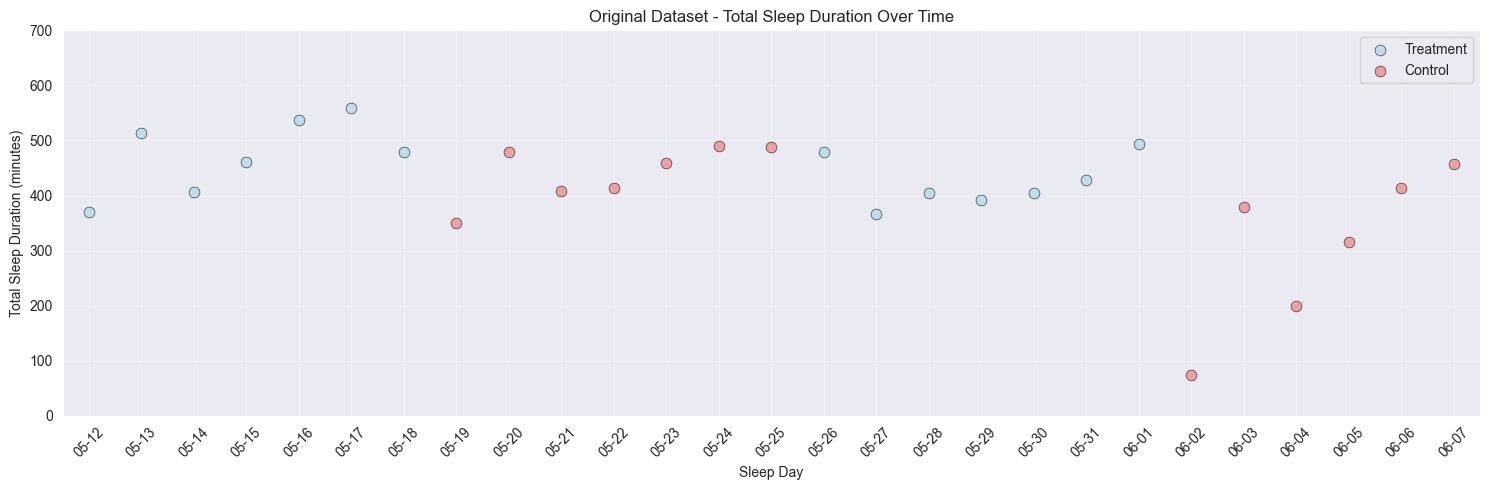

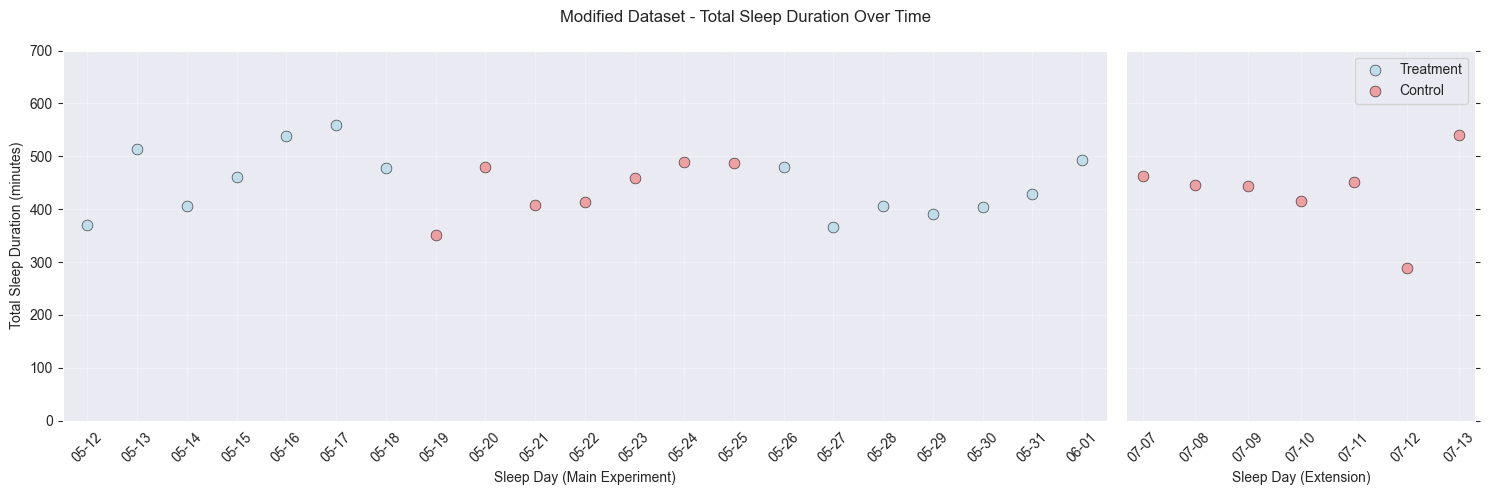

In [144]:
# Create scatter plots showing total sleep duration over time for treatment and control groups

# Original dataset plot
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 5))

treatment_dates = treatment_data["sleep_day"].to_numpy()
treatment_sleep_duration = treatment_data["total_sleep_duration_mins"].to_numpy()
control_dates = control_data["sleep_day"].to_numpy()
control_sleep_duration = control_data["total_sleep_duration_mins"].to_numpy()

ax1.scatter(treatment_dates, treatment_sleep_duration, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax1.scatter(control_dates, control_sleep_duration, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Sleep Day')
ax1.set_ylabel('Total Sleep Duration (minutes)')
ax1.set_title('Original Dataset - Total Sleep Duration Over Time')
ax1.set_ylim(0, 700)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis for original dataset
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xlim(treatment_dates.min() - np.timedelta64(12, 'h'), control_dates.max() + np.timedelta64(12, 'h'))
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../figures/sleep_time/sleep_duration_scatter_plots_original.png', dpi=300, bbox_inches='tight')
plt.show()

# Modified dataset with broken x-axis
# Separate the data into main experiment and extension
june_8_2025 = pl.date(2025, 6, 8)
main_treatment = modified_treatment_data.filter(pl.col("sleep_day") < june_8_2025)
main_control = modified_control_data.filter(pl.col("sleep_day") < june_8_2025)
extension_treatment = modified_treatment_data.filter(pl.col("sleep_day") >= june_8_2025)
extension_control = modified_control_data.filter(pl.col("sleep_day") >= june_8_2025)

# Create broken axis subplots with 3:1 width ratio
fig2, (ax2, ax3) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(15, 5),
                                gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.1)  # Add space between subplots

# Plot main experiment data on left axis
main_treatment_dates = main_treatment["sleep_day"].to_numpy()
main_treatment_duration = main_treatment["total_sleep_duration_mins"].to_numpy()
main_control_dates = main_control["sleep_day"].to_numpy()
main_control_duration = main_control["total_sleep_duration_mins"].to_numpy()

ax2.scatter(main_treatment_dates, main_treatment_duration, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax2.scatter(main_control_dates, main_control_duration, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Plot extension experiment data on right axis
extension_treatment_dates = extension_treatment["sleep_day"].to_numpy()
extension_treatment_duration = extension_treatment["total_sleep_duration_mins"].to_numpy()
extension_control_dates = extension_control["sleep_day"].to_numpy()
extension_control_duration = extension_control["total_sleep_duration_mins"].to_numpy()

ax3.scatter(extension_treatment_dates, extension_treatment_duration, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax3.scatter(extension_control_dates, extension_control_duration, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Set y-axis limits for both subplots
ax2.set_ylim(0, 700)
ax3.set_ylim(0, 700)

# Set axis limits to create the break
if len(main_treatment_dates) > 0:
    ax2.set_xlim(main_treatment_dates.min() - np.timedelta64(12, 'h'), main_treatment_dates.max() + np.timedelta64(12, 'h'))
if len(extension_treatment_dates) > 0:
    ax3.set_xlim(extension_treatment_dates.min() - np.timedelta64(12, 'h'), extension_treatment_dates.max() + np.timedelta64(12, 'h'))

# Hide the spines between ax2 and ax3
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.yaxis.tick_left()
ax2.tick_params(labelright=False)
ax3.yaxis.tick_right()
ax3.tick_params(labelleft=False)

# Format x-axis for broken axis plots
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set labels and titles
ax2.set_xlabel('Sleep Day (Main Experiment)')
ax2.set_ylabel('Total Sleep Duration (minutes)')
ax3.set_xlabel('Sleep Day (Extension)')
ax3.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Set overall title
fig2.suptitle('Modified Dataset - Total Sleep Duration Over Time')

plt.tight_layout()
plt.savefig("../figures/sleep_time/sleep_duration_scatter_plots.png", dpi=300, bbox_inches='tight')
plt.show()

In [145]:
len(control_data)

13

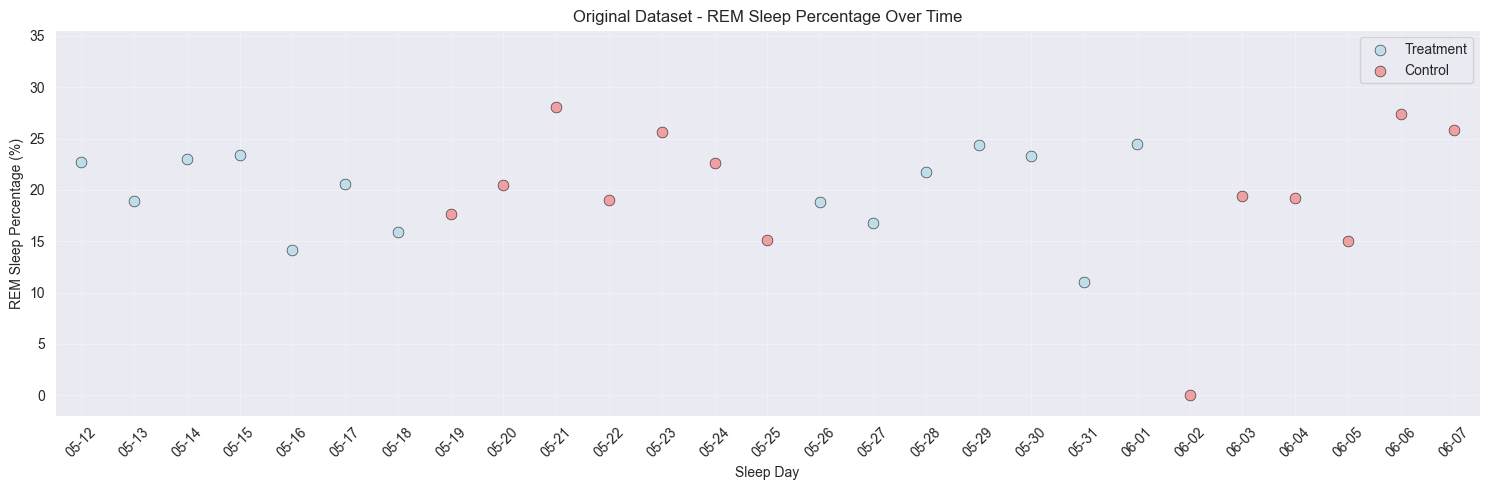

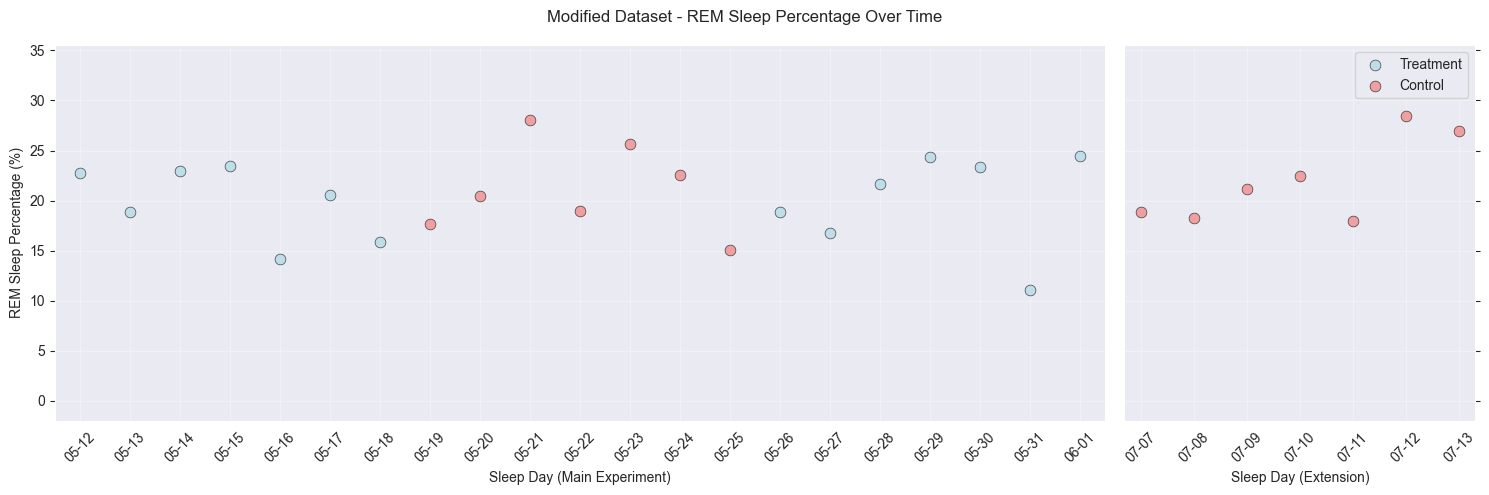

In [146]:
# Create scatter plots showing REM sleep percentage over time for treatment and control groups

# Original dataset plot
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 5))

treatment_dates = treatment_data["sleep_day"].to_numpy()
treatment_rem_percentage = treatment_data["rem_sleep_percentage"].to_numpy()
control_dates = control_data["sleep_day"].to_numpy()
control_rem_percentage = control_data["rem_sleep_percentage"].to_numpy()

# Calculate y-axis limits for REM sleep percentage
all_rem_data = np.concatenate([treatment_rem_percentage, control_rem_percentage])
rem_min, rem_max = np.min(all_rem_data), np.max(all_rem_data)
rem_ylim_min, rem_ylim_max = -2, rem_max + 7.5

ax1.scatter(treatment_dates, treatment_rem_percentage, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax1.scatter(control_dates, control_rem_percentage, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Sleep Day')
ax1.set_ylabel('REM Sleep Percentage (%)')
ax1.set_title('Original Dataset - REM Sleep Percentage Over Time')
ax1.set_ylim(rem_ylim_min, rem_ylim_max)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis for original dataset
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xlim(treatment_dates.min() - np.timedelta64(12, 'h'), control_dates.max() + np.timedelta64(12, 'h'))
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../figures/sleep_time/rem_sleep_percentage_scatter_plots_original.png", dpi=300, bbox_inches='tight')
plt.show()

# Modified dataset with broken x-axis
# Separate the data into main experiment and extension
june_8_2025 = pl.date(2025, 6, 8)
main_treatment = modified_treatment_data.filter(pl.col("sleep_day") < june_8_2025)
main_control = modified_control_data.filter(pl.col("sleep_day") < june_8_2025)
extension_treatment = modified_treatment_data.filter(pl.col("sleep_day") >= june_8_2025)
extension_control = modified_control_data.filter(pl.col("sleep_day") >= june_8_2025)

# Create broken axis subplots with 3:1 width ratio
fig2, (ax2, ax3) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(15, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.1)  # Add space between subplots

# Plot main experiment data on left axis
main_treatment_dates = main_treatment["sleep_day"].to_numpy()
main_treatment_rem = main_treatment["rem_sleep_percentage"].to_numpy()
main_control_dates = main_control["sleep_day"].to_numpy() 
main_control_rem = main_control["rem_sleep_percentage"].to_numpy()

ax2.scatter(main_treatment_dates, main_treatment_rem, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax2.scatter(main_control_dates, main_control_rem, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Plot extension experiment data on right axis
extension_treatment_dates = extension_treatment["sleep_day"].to_numpy()
extension_treatment_rem = extension_treatment["rem_sleep_percentage"].to_numpy()
extension_control_dates = extension_control["sleep_day"].to_numpy()
extension_control_rem = extension_control["rem_sleep_percentage"].to_numpy()

ax3.scatter(extension_treatment_dates, extension_treatment_rem, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax3.scatter(extension_control_dates, extension_control_rem, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Set y-axis limits for both subplots using the same range as original dataset
ax2.set_ylim(rem_ylim_min, rem_ylim_max)
ax3.set_ylim(rem_ylim_min, rem_ylim_max)

# Set axis limits to create the break
if len(main_treatment_dates) > 0:
    ax2.set_xlim(main_treatment_dates.min() - np.timedelta64(12, 'h'), main_treatment_dates.max() + np.timedelta64(12, 'h'))
if len(extension_treatment_dates) > 0:
    ax3.set_xlim(extension_treatment_dates.min() - np.timedelta64(12, 'h'), extension_treatment_dates.max() + np.timedelta64(12, 'h'))

# Hide the spines between ax2 and ax3
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.yaxis.tick_left()
ax2.tick_params(labelright=False)
ax3.yaxis.tick_right()
ax3.tick_params(labelleft=False)

# Format x-axis for broken axis plots
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set labels and titles
ax2.set_xlabel('Sleep Day (Main Experiment)')
ax2.set_ylabel('REM Sleep Percentage (%)')
ax3.set_xlabel('Sleep Day (Extension)')
ax3.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Set overall title
fig2.suptitle('Modified Dataset - REM Sleep Percentage Over Time')

plt.tight_layout()
plt.savefig("../figures/sleep_time/rem_sleep_percentage_scatter_plots.png", dpi=300, bbox_inches='tight')
plt.show()

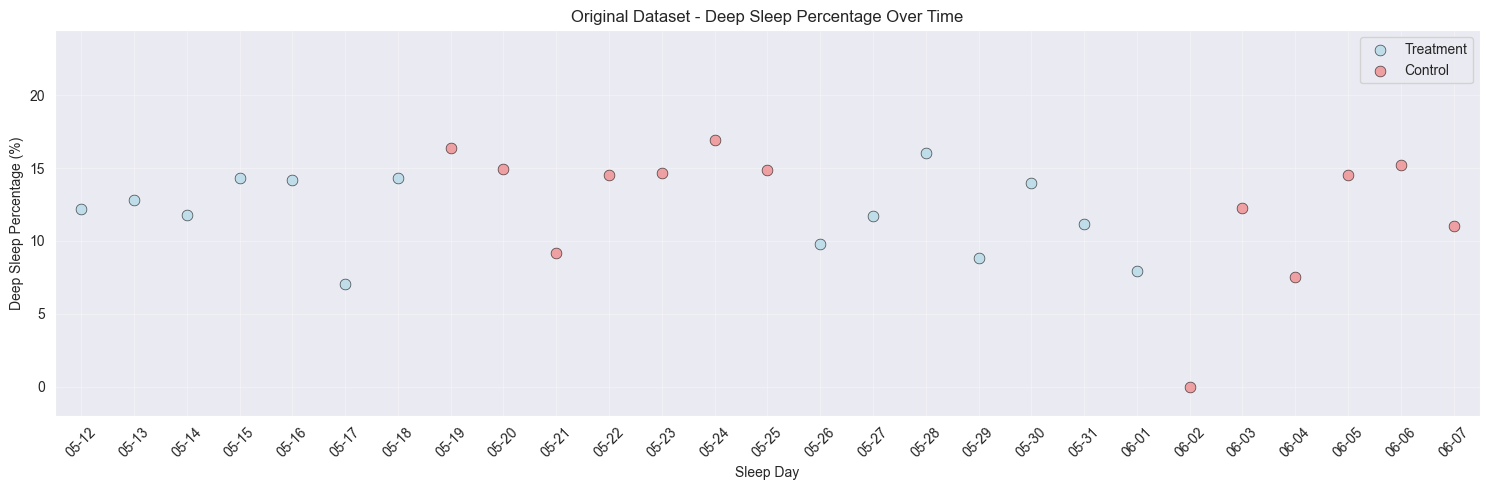

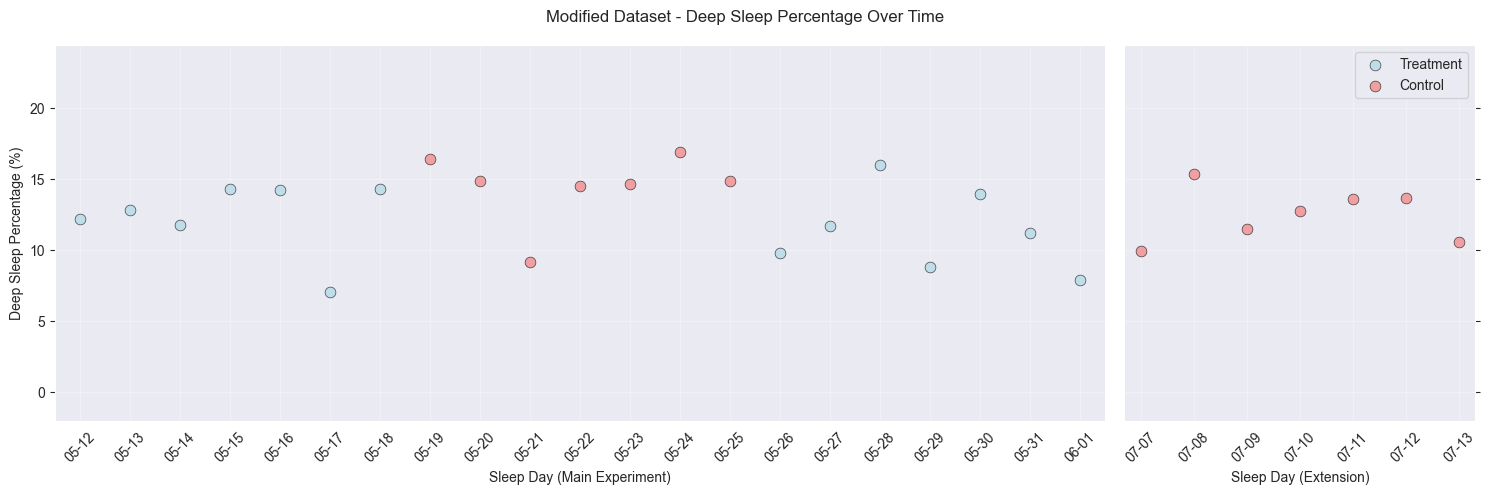

In [147]:
# Create scatter plots showing Deep sleep percentage over time for treatment and control groups

# Original dataset plot
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 5))

treatment_dates = treatment_data["sleep_day"].to_numpy()
treatment_deep_percentage = treatment_data["deep_sleep_percentage"].to_numpy()
control_dates = control_data["sleep_day"].to_numpy()
control_deep_percentage = control_data["deep_sleep_percentage"].to_numpy()

# Calculate y-axis limits for Deep sleep percentage
all_deep_data = np.concatenate([treatment_deep_percentage, control_deep_percentage])
deep_min, deep_max = np.min(all_deep_data), np.max(all_deep_data)
deep_ylim_min, deep_ylim_max = -2, deep_max + 7.5

ax1.scatter(treatment_dates, treatment_deep_percentage, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax1.scatter(control_dates, control_deep_percentage, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Sleep Day')
ax1.set_ylabel('Deep Sleep Percentage (%)')
ax1.set_title('Original Dataset - Deep Sleep Percentage Over Time')
ax1.set_ylim(deep_ylim_min, deep_ylim_max)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis for original dataset
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xlim(treatment_dates.min() - np.timedelta64(12, 'h'), control_dates.max() + np.timedelta64(12, 'h'))
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../figures/sleep_time/deep_sleep_percentage_scatter_plots_original.png", dpi=300, bbox_inches='tight')
plt.show()

# Modified dataset with broken x-axis
# Create broken axis subplots with 3:1 width ratio
fig2, (ax2, ax3) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(15, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.1)  # Add space between subplots

# Plot main experiment data on left axis
main_treatment_dates = main_treatment["sleep_day"].to_numpy()
main_treatment_deep = main_treatment["deep_sleep_percentage"].to_numpy()
main_control_dates = main_control["sleep_day"].to_numpy() 
main_control_deep = main_control["deep_sleep_percentage"].to_numpy()

ax2.scatter(main_treatment_dates, main_treatment_deep, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax2.scatter(main_control_dates, main_control_deep, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Plot extension experiment data on right axis
extension_treatment_dates = extension_treatment["sleep_day"].to_numpy()
extension_treatment_deep = extension_treatment["deep_sleep_percentage"].to_numpy()
extension_control_dates = extension_control["sleep_day"].to_numpy()
extension_control_deep = extension_control["deep_sleep_percentage"].to_numpy()

ax3.scatter(extension_treatment_dates, extension_treatment_deep, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax3.scatter(extension_control_dates, extension_control_deep, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Set y-axis limits for both subplots using the same range as original dataset
ax2.set_ylim(deep_ylim_min, deep_ylim_max)
ax3.set_ylim(deep_ylim_min, deep_ylim_max)

# Set axis limits to create the break
if len(main_treatment_dates) > 0:
    ax2.set_xlim(main_treatment_dates.min() - np.timedelta64(12, 'h'), main_treatment_dates.max() + np.timedelta64(12, 'h'))
if len(extension_treatment_dates) > 0:
    ax3.set_xlim(extension_treatment_dates.min() - np.timedelta64(12, 'h'), extension_treatment_dates.max() + np.timedelta64(12, 'h'))

# Hide the spines between ax2 and ax3
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.yaxis.tick_left()
ax2.tick_params(labelright=False)
ax3.yaxis.tick_right()
ax3.tick_params(labelleft=False)

# Format x-axis for broken axis plots
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set labels and titles
ax2.set_xlabel('Sleep Day (Main Experiment)')
ax2.set_ylabel('Deep Sleep Percentage (%)')
ax3.set_xlabel('Sleep Day (Extension)')
ax3.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Set overall title
fig2.suptitle('Modified Dataset - Deep Sleep Percentage Over Time')

plt.tight_layout()
plt.savefig("../figures/sleep_time/deep_sleep_percentage_scatter_plots.png", dpi=300, bbox_inches='tight')
plt.show()

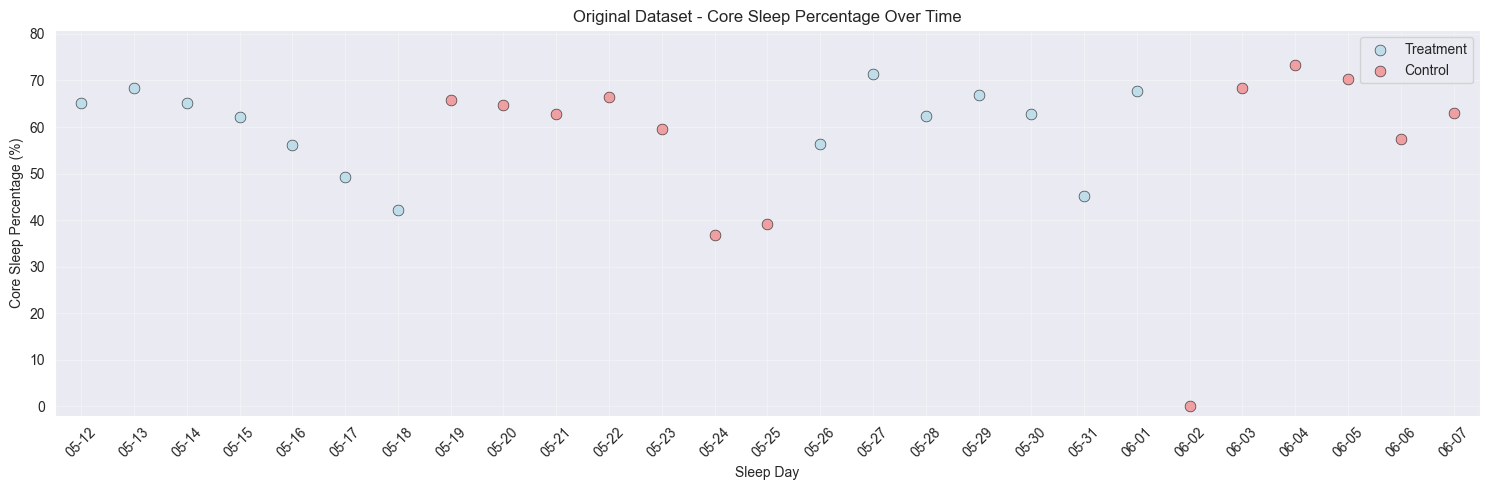

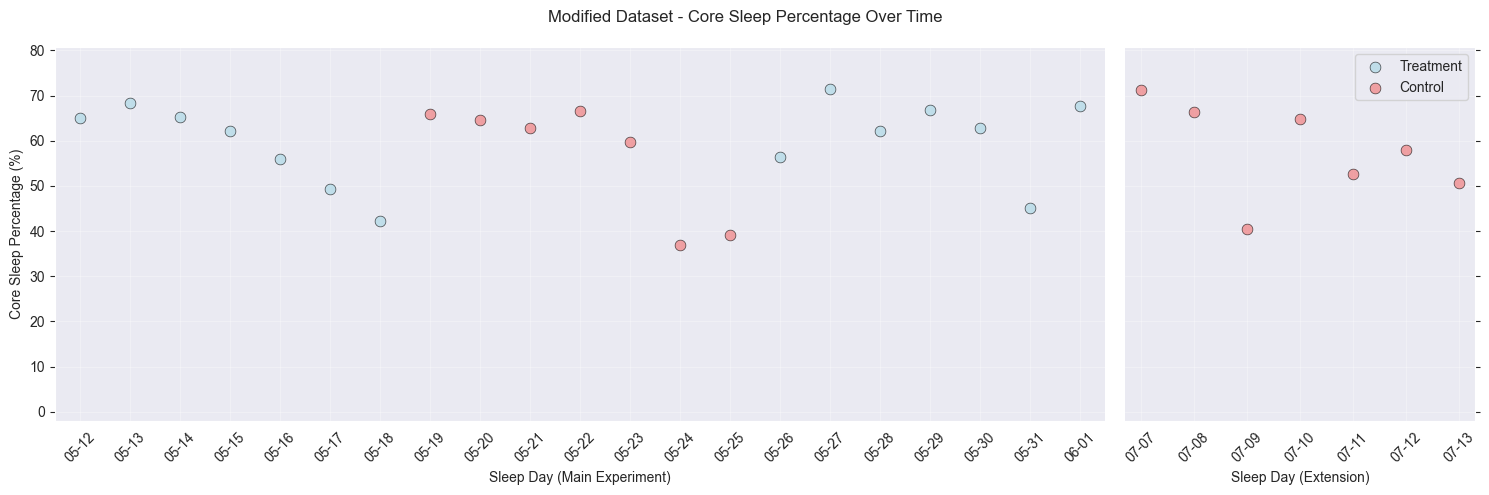

In [148]:
# Create scatter plots showing Core sleep percentage over time for treatment and control groups

# Original dataset plot
fig1, ax1 = plt.subplots(1, 1, figsize=(15, 5))

treatment_dates = treatment_data["sleep_day"].to_numpy()
treatment_core_percentage = treatment_data["core_sleep_percentage"].to_numpy()
control_dates = control_data["sleep_day"].to_numpy()
control_core_percentage = control_data["core_sleep_percentage"].to_numpy()

# Calculate y-axis limits for Core sleep percentage
all_core_data = np.concatenate([treatment_core_percentage, control_core_percentage])
core_min, core_max = np.min(all_core_data), np.max(all_core_data)
core_ylim_min, core_ylim_max = -2, core_max + 7.5

ax1.scatter(treatment_dates, treatment_core_percentage, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax1.scatter(control_dates, control_core_percentage, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Sleep Day')
ax1.set_ylabel('Core Sleep Percentage (%)')
ax1.set_title('Original Dataset - Core Sleep Percentage Over Time')
ax1.set_ylim(core_ylim_min, core_ylim_max)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Format x-axis for original dataset
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_xlim(treatment_dates.min() - np.timedelta64(12, 'h'), control_dates.max() + np.timedelta64(12, 'h'))
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../figures/sleep_time/core_sleep_percentage_scatter_plots_original.png", dpi=300, bbox_inches='tight')
plt.show()

# Modified dataset with broken x-axis
# Create broken axis subplots with 3:1 width ratio
fig2, (ax2, ax3) = plt.subplots(1, 2, sharey=True, facecolor='w', figsize=(15, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.1)  # Add space between subplots

# Plot main experiment data on left axis
main_treatment_dates = main_treatment["sleep_day"].to_numpy()
main_treatment_core = main_treatment["core_sleep_percentage"].to_numpy()
main_control_dates = main_control["sleep_day"].to_numpy() 
main_control_core = main_control["core_sleep_percentage"].to_numpy()

ax2.scatter(main_treatment_dates, main_treatment_core, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax2.scatter(main_control_dates, main_control_core, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Plot extension experiment data on right axis
extension_treatment_dates = extension_treatment["sleep_day"].to_numpy()
extension_treatment_core = extension_treatment["core_sleep_percentage"].to_numpy()
extension_control_dates = extension_control["sleep_day"].to_numpy()
extension_control_core = extension_control["core_sleep_percentage"].to_numpy()

ax3.scatter(extension_treatment_dates, extension_treatment_core, color='lightblue', alpha=0.7, s=60, label='Treatment', edgecolors='black', linewidth=0.5)
ax3.scatter(extension_control_dates, extension_control_core, color='lightcoral', alpha=0.7, s=60, label='Control', edgecolors='black', linewidth=0.5)

# Set y-axis limits for both subplots using the same range as original dataset
ax2.set_ylim(core_ylim_min, core_ylim_max)
ax3.set_ylim(core_ylim_min, core_ylim_max)

# Set axis limits to create the break
if len(main_treatment_dates) > 0:
    ax2.set_xlim(main_treatment_dates.min() - np.timedelta64(12, 'h'), main_treatment_dates.max() + np.timedelta64(12, 'h'))
if len(extension_treatment_dates) > 0:
    ax3.set_xlim(extension_treatment_dates.min() - np.timedelta64(12, 'h'), extension_treatment_dates.max() + np.timedelta64(12, 'h'))

# Hide the spines between ax2 and ax3
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax2.yaxis.tick_left()
ax2.tick_params(labelright=False)
ax3.yaxis.tick_right()
ax3.tick_params(labelleft=False)

# Format x-axis for broken axis plots
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.xaxis.set_major_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Set labels and titles
ax2.set_xlabel('Sleep Day (Main Experiment)')
ax2.set_ylabel('Core Sleep Percentage (%)')
ax3.set_xlabel('Sleep Day (Extension)')
ax3.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Set overall title
fig2.suptitle('Modified Dataset - Core Sleep Percentage Over Time')

plt.tight_layout()
plt.savefig("../figures/sleep_time/core_sleep_percentage_scatter_plots.png", dpi=300, bbox_inches='tight')
plt.show()

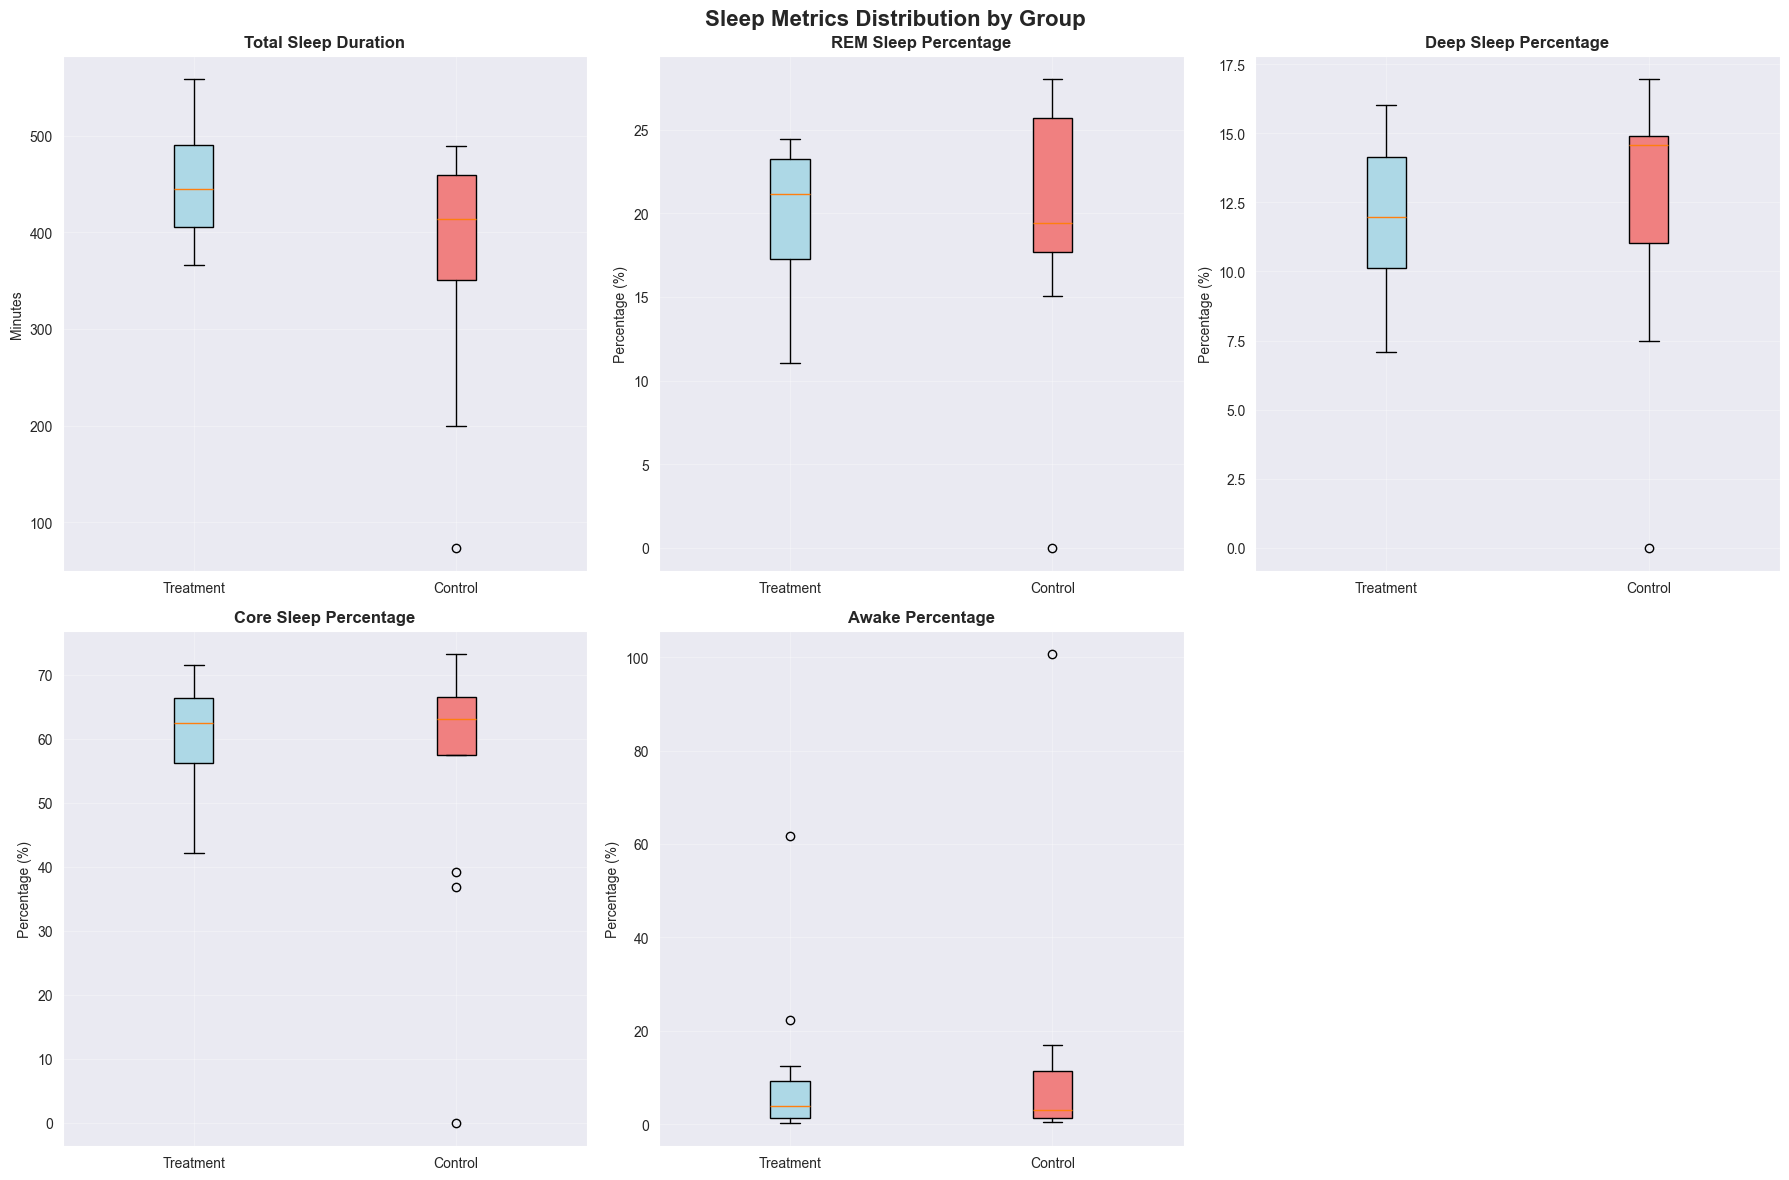

In [149]:
# Create box plots for all sleep metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sleep Metrics Distribution by Group', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

do_notch = False

# Sleep Duration box plot
sleep_duration_treatment = treatment_data["total_sleep_duration_mins"].to_numpy()
sleep_duration_control = control_data["total_sleep_duration_mins"].to_numpy()

box_data_duration = [sleep_duration_treatment, sleep_duration_control]
bp1 = axes[0].boxplot(box_data_duration, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp1['boxes'][0].set_facecolor('lightblue')
bp1['boxes'][1].set_facecolor('lightcoral')
axes[0].set_title('Total Sleep Duration', fontweight='bold')
axes[0].set_ylabel('Minutes')
axes[0].grid(True, alpha=0.3)

# REM Sleep Percentage box plot
box_data_rem = [rem_treatment, rem_control]
bp2 = axes[1].boxplot(box_data_rem, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp2['boxes'][0].set_facecolor('lightblue')
bp2['boxes'][1].set_facecolor('lightcoral')
axes[1].set_title('REM Sleep Percentage', fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].grid(True, alpha=0.3)

# Deep Sleep Percentage box plot
box_data_deep = [deep_treatment, deep_control]
bp3 = axes[2].boxplot(box_data_deep, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp3['boxes'][0].set_facecolor('lightblue')
bp3['boxes'][1].set_facecolor('lightcoral')
axes[2].set_title('Deep Sleep Percentage', fontweight='bold')
axes[2].set_ylabel('Percentage (%)')
axes[2].grid(True, alpha=0.3)

# Core Sleep Percentage box plot
box_data_core = [core_treatment, core_control]
bp4 = axes[3].boxplot(box_data_core, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp4['boxes'][0].set_facecolor('lightblue')
bp4['boxes'][1].set_facecolor('lightcoral')
axes[3].set_title('Core Sleep Percentage', fontweight='bold')
axes[3].set_ylabel('Percentage (%)')
axes[3].grid(True, alpha=0.3)

# Awake Percentage box plot
box_data_awake = [awake_treatment, awake_control]
bp5 = axes[4].boxplot(box_data_awake, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp5['boxes'][0].set_facecolor('lightblue')
bp5['boxes'][1].set_facecolor('lightcoral')
axes[4].set_title('Awake Percentage', fontweight='bold')
axes[4].set_ylabel('Percentage (%)')
axes[4].grid(True, alpha=0.3)

# Hide the last subplot (we only have 5 metrics)
axes[5].set_visible(False)

plt.tight_layout()
plt.savefig('../figures/statistical/sleep_metrics_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

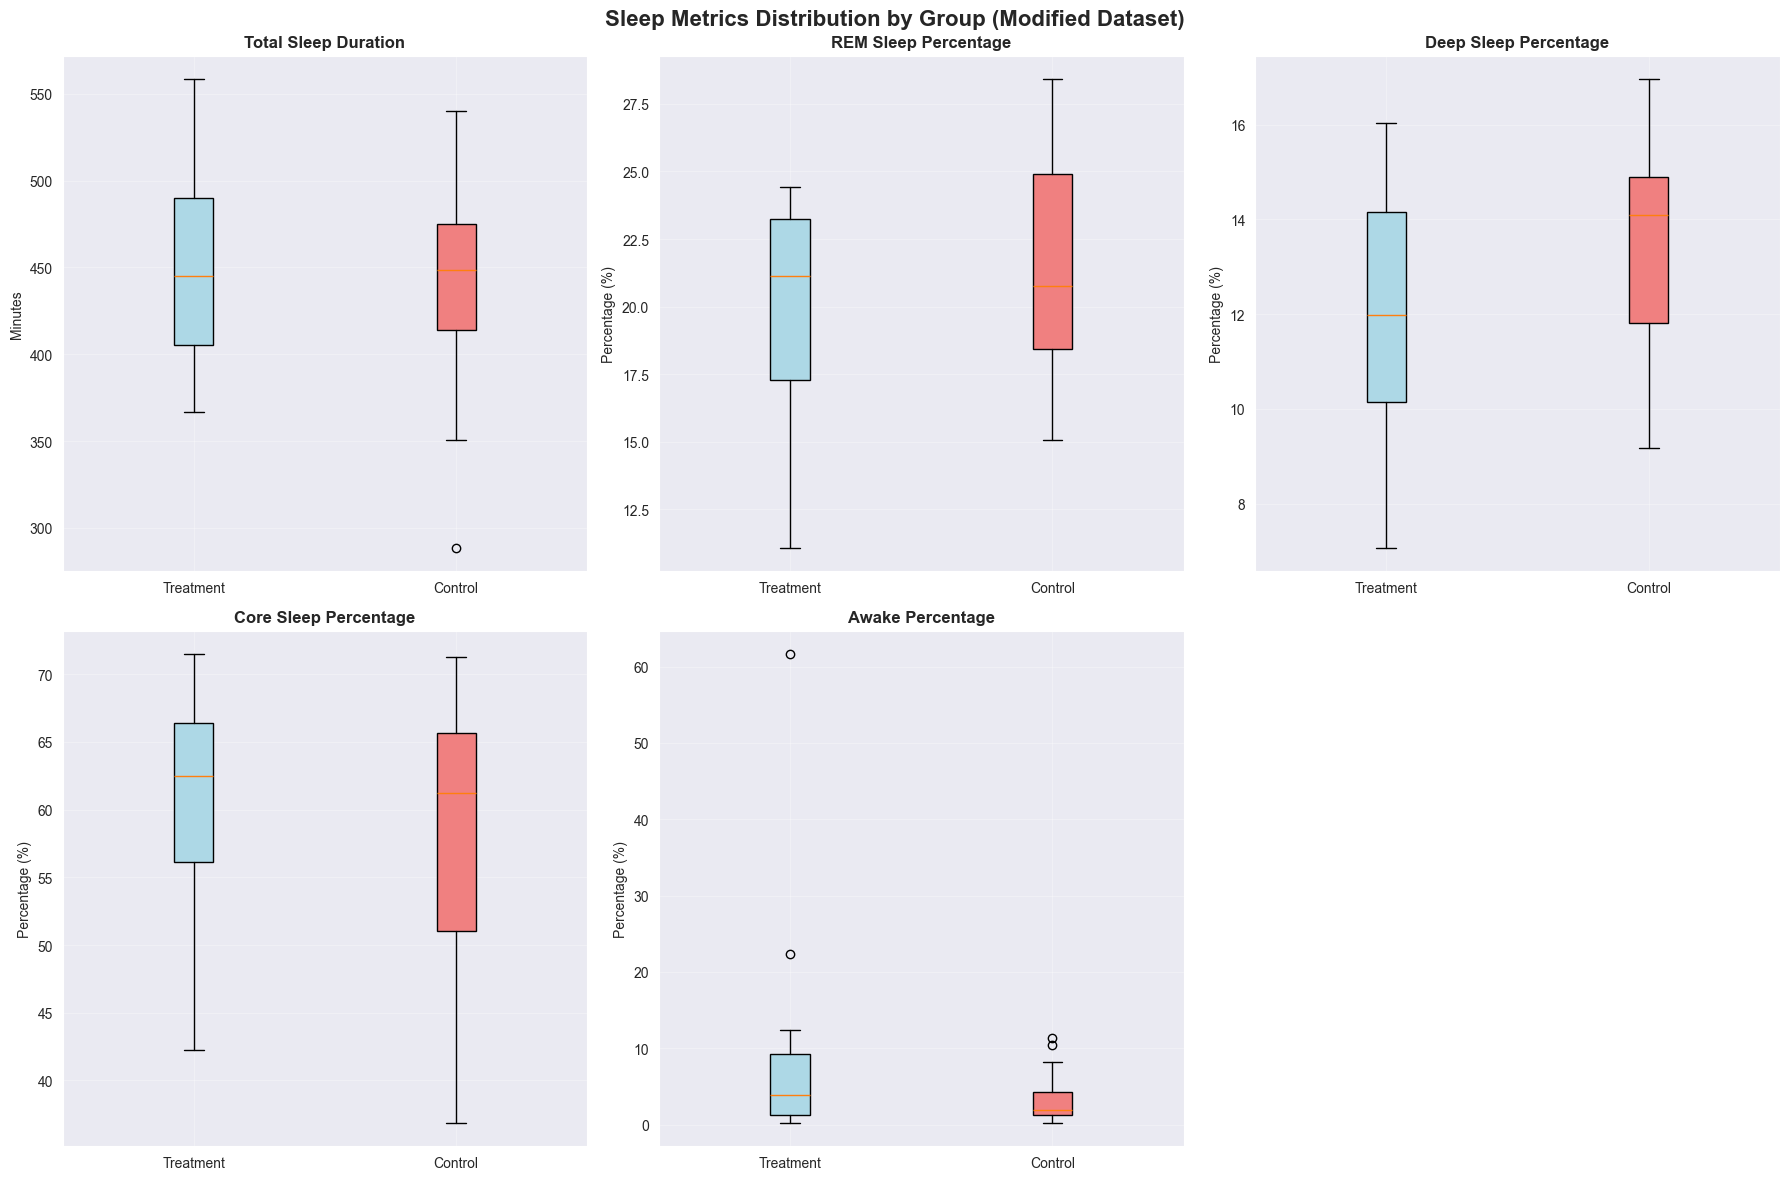

In [150]:
# Create box plots for all sleep metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Sleep Metrics Distribution by Group (Modified Dataset)', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes = axes.flatten()

do_notch = False

# Sleep Duration box plot
sleep_duration_treatment = modified_treatment_data["total_sleep_duration_mins"].to_numpy()
sleep_duration_control = modified_control_data["total_sleep_duration_mins"].to_numpy()

box_data_duration = [sleep_duration_treatment, sleep_duration_control]
bp1 = axes[0].boxplot(box_data_duration, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp1['boxes'][0].set_facecolor('lightblue')
bp1['boxes'][1].set_facecolor('lightcoral')
axes[0].set_title('Total Sleep Duration', fontweight='bold')
axes[0].set_ylabel('Minutes')
axes[0].grid(True, alpha=0.3)

# REM Sleep Percentage box plot
box_data_rem = [modified_rem_treatment, modified_rem_control]
bp2 = axes[1].boxplot(box_data_rem, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp2['boxes'][0].set_facecolor('lightblue')
bp2['boxes'][1].set_facecolor('lightcoral')
axes[1].set_title('REM Sleep Percentage', fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
axes[1].grid(True, alpha=0.3)

# Deep Sleep Percentage box plot
box_data_deep = [modified_deep_treatment, modified_deep_control]
bp3 = axes[2].boxplot(box_data_deep, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp3['boxes'][0].set_facecolor('lightblue')
bp3['boxes'][1].set_facecolor('lightcoral')
axes[2].set_title('Deep Sleep Percentage', fontweight='bold')
axes[2].set_ylabel('Percentage (%)')
axes[2].grid(True, alpha=0.3)

# Core Sleep Percentage box plot
box_data_core = [modified_core_treatment, modified_core_control]
bp4 = axes[3].boxplot(box_data_core, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp4['boxes'][0].set_facecolor('lightblue')
bp4['boxes'][1].set_facecolor('lightcoral')
axes[3].set_title('Core Sleep Percentage', fontweight='bold')
axes[3].set_ylabel('Percentage (%)')
axes[3].grid(True, alpha=0.3)

# Awake Percentage box plot
box_data_awake = [modified_awake_treatment, modified_awake_control]
bp5 = axes[4].boxplot(box_data_awake, tick_labels=['Treatment', 'Control'],
                      patch_artist=True, notch=do_notch, bootstrap=1000)
bp5['boxes'][0].set_facecolor('lightblue')
bp5['boxes'][1].set_facecolor('lightcoral')
axes[4].set_title('Awake Percentage', fontweight='bold')
axes[4].set_ylabel('Percentage (%)')
axes[4].grid(True, alpha=0.3)

# Hide the last subplot (we only have 5 metrics)
axes[5].set_visible(False)

plt.tight_layout()
plt.savefig('../figures/statistical/sleep_metrics_boxplots_modified.png', dpi=300, bbox_inches='tight')
plt.show()

In [151]:
# Generate descriptive statistics table in typst format
def calculate_descriptive_stats(data, group_name):
    """Calculate descriptive statistics for a given dataset"""
    stats = {
        'group': group_name,
        'n': len(data),
        'mean': np.mean(data),
        'std': np.std(data, ddof=1),
        'median': np.median(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75),
        'min': np.min(data),
        'max': np.max(data)
    }
    return stats

def create_descriptive_stats_typst_table(stats_dict):
    """Create typst formatted table for descriptive statistics with improved formatting"""

    typst_table = f"""#figure(
  table(
    columns: (1.2fr, 0.8fr, 0.6fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr),
    align: (col, row) => {{
      if row == 0 {{ center + horizon }}
      else if col == 0 {{ left + horizon }}
      else if col == 1 {{ center + horizon }}
      else {{ right + horizon }}
    }},
    inset: (x: 8pt, y: 6pt),
    stroke: (x, y) => {{
      if y == 0 {{
        (bottom: 1.5pt + black, rest: 0.75pt + gray.lighten(40%))
      }}
      else {{
        (bottom: 0.5pt + gray.lighten(60%), rest: 0.75pt + gray.lighten(40%))
      }}
    }},
    fill: (col, row) => {{
      if row == 0 {{ gray.lighten(85%) }}
      else if calc.odd(row) {{ gray.lighten(95%) }}
      else {{ white }}
    }},
    table.header(
      [*Variable*],
      [*Group*],
      [*N*],
      [*Mean*],
      [*Std*],
      [*Median*],
      [*Q1*],
      [*Q3*],
      [*Min*],
      [*Max*]
    ),"""

    for variable, groups in stats_dict.items():
        for group_stats in groups:
            # Format numbers with appropriate precision
            n_val = f"{group_stats['n']}"
            mean_val = f"{group_stats['mean']:.3g}"  # 3 significant digits
            std_val = f"{group_stats['std']:.3g}"
            median_val = f"{group_stats['median']:.3g}"
            q1_val = f"{group_stats['q1']:.3g}"
            q3_val = f"{group_stats['q3']:.3g}"
            min_val = f"{group_stats['min']:.3g}"
            max_val = f"{group_stats['max']:.3g}"

            typst_table += f"""
    [*{variable}*],
    [{group_stats['group'][0].upper()}],
    [{n_val}],
    [{mean_val}],
    [{std_val}],
    [{median_val}],
    [{q1_val}],
    [{q3_val}],
    [{min_val}],
    [{max_val}],"""

    typst_table += """
  ),
  caption: [Descriptive Statistics by Variable and Group],
  kind: table
)"""

    return typst_table

# Calculate descriptive statistics for all sleep variables (using modified dataset)
descriptive_stats = {}

# Sleep duration statistics
sleep_duration_stats = [
    calculate_descriptive_stats(modified_treatment_data["total_sleep_duration_mins"].to_numpy(), "Treatment"),
    calculate_descriptive_stats(modified_control_data["total_sleep_duration_mins"].to_numpy(), "Control")
]
descriptive_stats["Sleep (mins)"] = sleep_duration_stats

# REM sleep percentage statistics
rem_percentage_stats = [
    calculate_descriptive_stats(modified_rem_treatment, "Treatment"),
    calculate_descriptive_stats(modified_rem_control, "Control")
]
descriptive_stats["REM (%)"] = rem_percentage_stats

# Deep sleep percentage statistics
deep_percentage_stats = [
    calculate_descriptive_stats(modified_deep_treatment, "Treatment"),
    calculate_descriptive_stats(modified_deep_control, "Control")
]
descriptive_stats["Deep (%)"] = deep_percentage_stats

# Core sleep percentage statistics
core_percentage_stats = [
    calculate_descriptive_stats(modified_core_treatment, "Treatment"),
    calculate_descriptive_stats(modified_core_control, "Control")
]
descriptive_stats["Core (%)"] = core_percentage_stats

# Awake percentage statistics
awake_percentage_stats = [
    calculate_descriptive_stats(modified_awake_treatment, "Treatment"),
    calculate_descriptive_stats(modified_awake_control, "Control")
]
descriptive_stats["Awake (%)"] = awake_percentage_stats

# Generate and print typst table
descriptive_typst_table = create_descriptive_stats_typst_table(descriptive_stats)
print(descriptive_typst_table)

#figure(
  table(
    columns: (1.2fr, 0.8fr, 0.6fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr),
    align: (col, row) => {
      if row == 0 { center + horizon }
      else if col == 0 { left + horizon }
      else if col == 1 { center + horizon }
      else { right + horizon }
    },
    inset: (x: 8pt, y: 6pt),
    stroke: (x, y) => {
      if y == 0 {
        (bottom: 1.5pt + black, rest: 0.75pt + gray.lighten(40%))
      }
      else {
        (bottom: 0.5pt + gray.lighten(60%), rest: 0.75pt + gray.lighten(40%))
      }
    },
    fill: (col, row) => {
      if row == 0 { gray.lighten(85%) }
      else if calc.odd(row) { gray.lighten(95%) }
      else { white }
    },
    table.header(
      [*Variable*],
      [*Group*],
      [*N*],
      [*Mean*],
      [*Std*],
      [*Median*],
      [*Q1*],
      [*Q3*],
      [*Min*],
      [*Max*]
    ),
    [*Sleep (mins)*],
    [T],
    [14],
    [450],
    [62.3],
    [445],
    [405],
    [490],
    [366],
    [558],
    [*Sleep 

In [152]:
# Calculate descriptive statistics for all sleep variables (using modified dataset)
descriptive_stats = {}

# Sleep duration statistics
sleep_duration_stats = [
    calculate_descriptive_stats(treatment_data["total_sleep_duration_mins"].to_numpy(), "Treatment"),
    calculate_descriptive_stats(control_data["total_sleep_duration_mins"].to_numpy(), "Control")
]
descriptive_stats["Sleep (mins)"] = sleep_duration_stats

# REM sleep percentage statistics
rem_percentage_stats = [
    calculate_descriptive_stats(rem_treatment, "Treatment"),
    calculate_descriptive_stats(rem_control, "Control")
]
descriptive_stats["REM (%)"] = rem_percentage_stats

# Deep sleep percentage statistics
deep_percentage_stats = [
    calculate_descriptive_stats(deep_treatment, "Treatment"),
    calculate_descriptive_stats(deep_control, "Control")
]
descriptive_stats["Deep (%)"] = deep_percentage_stats

# Core sleep percentage statistics
core_percentage_stats = [
    calculate_descriptive_stats(core_treatment, "Treatment"),
    calculate_descriptive_stats(core_control, "Control")
]
descriptive_stats["Core (%)"] = core_percentage_stats

# Awake percentage statistics
awake_percentage_stats = [
    calculate_descriptive_stats(awake_treatment, "Treatment"),
    calculate_descriptive_stats(awake_control, "Control")
]
descriptive_stats["Awake (%)"] = awake_percentage_stats

# Generate and print typst table
descriptive_typst_table = create_descriptive_stats_typst_table(descriptive_stats)
print(descriptive_typst_table)

#figure(
  table(
    columns: (1.2fr, 0.8fr, 0.6fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr, 0.8fr),
    align: (col, row) => {
      if row == 0 { center + horizon }
      else if col == 0 { left + horizon }
      else if col == 1 { center + horizon }
      else { right + horizon }
    },
    inset: (x: 8pt, y: 6pt),
    stroke: (x, y) => {
      if y == 0 {
        (bottom: 1.5pt + black, rest: 0.75pt + gray.lighten(40%))
      }
      else {
        (bottom: 0.5pt + gray.lighten(60%), rest: 0.75pt + gray.lighten(40%))
      }
    },
    fill: (col, row) => {
      if row == 0 { gray.lighten(85%) }
      else if calc.odd(row) { gray.lighten(95%) }
      else { white }
    },
    table.header(
      [*Variable*],
      [*Group*],
      [*N*],
      [*Mean*],
      [*Std*],
      [*Median*],
      [*Q1*],
      [*Q3*],
      [*Min*],
      [*Max*]
    ),
    [*Sleep (mins)*],
    [T],
    [14],
    [450],
    [62.3],
    [445],
    [405],
    [490],
    [366],
    [558],
    [*Sleep 